In [5]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_excel("/Users/Ayesha/Desktop/usedcars1.xlsx");

In [7]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner‚Äîmust sell ...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [8]:
print(df.shape);

(2000, 25)


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
id              2000 non-null int64
url             2000 non-null object
region          2000 non-null object
region_url      2000 non-null object
price           2000 non-null int64
year            2000 non-null int64
manufacturer    1913 non-null object
model           1982 non-null object
condition       1058 non-null object
cylinders       1196 non-null object
fuel            2000 non-null object
odometer        1687 non-null float64
title_status    2000 non-null object
transmission    1986 non-null object
vin             1222 non-null object
drive           1390 non-null object
size            586 non-null object
type            1493 non-null object
paint_color     1315 non-null object
image_url       2000 non-null object
description     2000 non-null object
county          1 non-null object
state           2000 non-null object
lat             1990 non-null float64
long      

In [10]:
df.describe(include=['O']) #Categorical data

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state
count,2000,2000,2000,1913,1982,1058,1196,2000,2000,1986,1222,1390,586,1493,1315,2000,2000,1,2000
unique,2000,17,17,34,1027,5,7,5,6,3,1141,3,4,12,12,1943,1994,1,11
top,https://albuquerque.craigslist.org/ctd/d/albuq...,bellingham,https://bellingham.craigslist.org,ford,f-150,excellent,4 cylinders,gas,clean,automatic,3N1CN7AP7JL808209,4wd,full-size,SUV,white,https://images.craigslist.org/00f0f_2i1JYewwwQ...,‚óè- WE BUY CARS AND TRUCKS WITH TITLE AND WIT...,wa,wa
freq,1,601,601,380,49,466,451,1803,1912,1789,4,695,296,440,317,4,2,1,647


In [11]:
df.describe() #Numerical data

,id,price,year,odometer,lat,long
count,2.000000e+03,2000.000000,2000.000000,1.687000e+03,1990.000000,1989.00000
mean,7.187021e+09,15939.718000,2010.095500,9.612943e+04,41.802280,-101.44358
std,4.234579e+06,15132.126682,9.981242,9.976669e+04,8.534999,16.86056
min,7.179432e+09,0.000000,1927.000000,0.000000e+00,-117.412000,-122.76300
25%,7.184195e+09,5950.000000,2007.000000,3.872450e+04,35.324000,-122.29700
50%,7.185858e+09,11995.000000,2012.000000,8.400000e+04,45.553400,-97.04500
75%,7.187821e+09,20950.000000,2016.000000,1.367695e+05,47.920200,-91.51590
max,7.195198e+09,150000.000000,2020.000000,2.564237e+06,48.970600,-71.97740


id              2000
url             2000
region            17
region_url        17
price            732
year              65
manufacturer      34
model           1027
condition          5
cylinders          7
fuel               5
odometer        1374
title_status       6
transmission       3
vin             1141
drive              3
size               4
type              12
paint_color       12
image_url       1943
description     1994
county             1
state             11
lat              578
long             565
dtype: int64


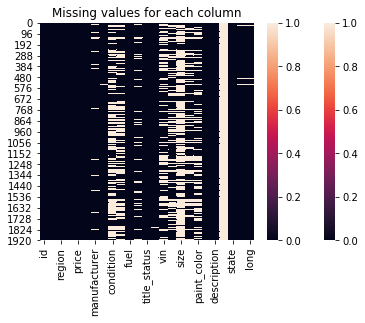

In [12]:
sns.heatmap(df.isnull())
print(df.nunique(axis=0));
plt.title("Missing values for each column")
sns.heatmap(df.isnull())
plt.show()

In [13]:
NA_val = df.isna().sum();
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = [];
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i);
    return col_pass;
df_cleaned = df[na_filter(NA_val)];
print(df_cleaned.columns);

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'type', 'paint_color', 'image_url', 'description', 'state',
       'lat', 'long'],
      dtype='object')


In [14]:
df_cleaned = df_cleaned.copy().drop(['id','model'],axis=1);
print(df_cleaned.shape);

(2000, 19)


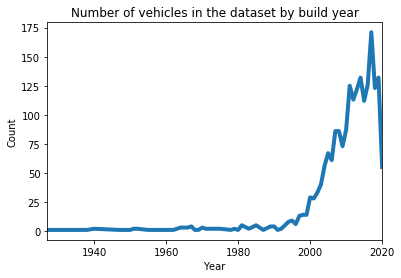

In [15]:
df[df.year >= 1900].year.value_counts().sort_index().plot(lw = 4)
plt.title("Number of vehicles in the dataset by build year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [20]:
df_cleaned = df_cleaned[df_cleaned['year'].between(1900, 2020)]# = 140000 + 1.5 * (140000-52379)
df_cleaned = df_cleaned[df_cleaned['odometer'].between(0, 271431.5)]
df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 250000)];

In [21]:
print(df_cleaned.isnull().sum());

url               0
region            0
region_url        0
price             0
year              0
manufacturer     48
fuel              0
odometer          0
title_status      0
transmission     14
vin             448
drive           366
type            256
paint_color     448
image_url         0
description       0
state             0
lat               2
long              3
dtype: int64


In [23]:

mode2 = df_cleaned["drive"].mode().values[0];
mode3= df_cleaned["type"].mode().values[0];
mode4= df_cleaned["condition"].mode().values[0];


df_cleaned["drive"]=df_cleaned["drive"].replace(np.nan,mode2);
df_cleaned["type"]=df_cleaned["type"].replace(np.NaN,mode3);
df_cleaned["condition"]=df_cleaned["condition"].replace(np.nan,mode4);
print(df_cleaned);

KeyError: 'condition'

In [24]:
print(df_cleaned.isnull().sum());

url               0
region            0
region_url        0
price             0
year              0
manufacturer     48
fuel              0
odometer          0
title_status      0
transmission     14
vin             448
drive           366
type            256
paint_color     448
image_url         0
description       0
state             0
lat               2
long              3
dtype: int64


In [25]:
df_cleaned=df_cleaned.dropna();

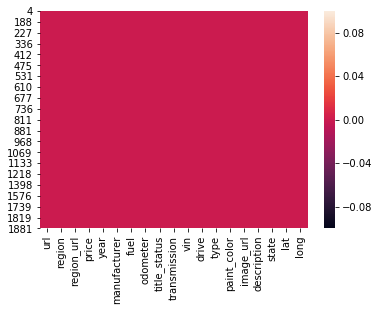

In [26]:
sns.heatmap(df_cleaned.isnull());

In [27]:
duplicate = df_cleaned.duplicated();
print(duplicate.sum());

0


In [28]:
df_cleaned.drop_duplicates(inplace=True);
dp1=df_cleaned.duplicated();
print(dp1.sum());

0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_cleaned['type']=df_cleaned['type'].str.lower();
print(df_cleaned['type']);

4       truck
5       truck
6         suv
7         suv
8         suv
        ...  
1987    truck
1991    sedan
1992    sedan
1994    truck
1996    truck
Name: type, Length: 608, dtype: object


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


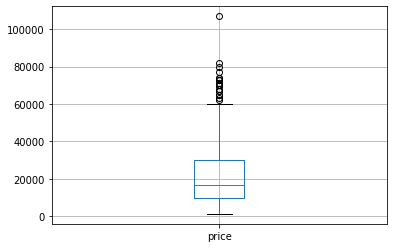

In [30]:
df_cleaned.boxplot(column=["price"])

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range 

In [32]:
lowprice, highprice=remove_outlier(df_cleaned["price"])
df_cleaned["price"]=np.where(df_cleaned["price"]>highprice,highprice,df_cleaned["price"])
df_cleaned["price"]=np.where(df_cleaned["price"]<lowprice,lowprice,df_cleaned["price"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


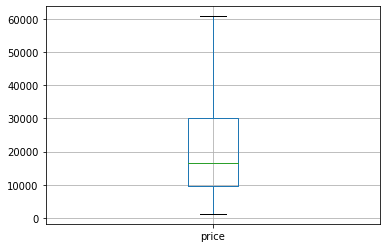

In [33]:
df_cleaned.boxplot(column=["price"])

In [34]:
print(df_cleaned.shape);

(608, 19)


In [35]:
df_cleaned.mean()

price       21545.124794
year         2013.245066
odometer    85172.337171
lat            43.770932
long         -102.462420
dtype: float64

In [36]:
df_cleaned.var()

price       2.397348e+08
year        3.469602e+01
odometer    3.554304e+09
lat         3.217492e+01
long        2.921059e+02
dtype: float64

In [37]:
from sklearn.preprocessing import MinMaxScaler
col = ['price', 'odometer', 'lat', 'long']
data = df_cleaned[col]
s = data.values.astype(float)
min_max_scaler = MinMaxScaler(feature_range=(0,1))
s_scaled = min_max_scaler.fit_transform(s)
df_normalized = pd.DataFrame(s_scaled, columns=col,index=df_cleaned.index)
df_normalized = df_normalized.rename(columns={'price':'n_price', 'odometer':'n_odometer', 'lat':'n_lat', 'long':'n_long'})
df_cleaned = pd.concat([df_cleaned, df_normalized],axis=1)
df_cleaned

,url,region,region_url,price,year,manufacturer,fuel,odometer,title_status,transmission,...,paint_color,image_url,description,state,lat,long,n_price,n_odometer,n_lat,n_long
4,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995.000,2007,gmc,diesel,254217.0,clean,automatic,...,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",mn,45.6836,-92.9648,0.265242,0.940395,0.860505,0.595716
5,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,13995.000,2012,ford,gas,188406.0,clean,automatic,...,grey,https://images.craigslist.org/00W0W_io2cwEVtyh...,"**Bad Credit, No Credit... No Problem!**2012 F...",mn,45.6836,-92.9648,0.214864,0.696948,0.860505,0.595716
6,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,7995.000,2010,chevrolet,gas,108124.0,clean,automatic,...,grey,https://images.craigslist.org/00404_j5GItixnjX...,"**Bad Credit, No Credit... No Problem!**2010 C...",mn,45.6836,-92.9648,0.114107,0.399970,0.860505,0.595716
7,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,8995.000,2011,chevrolet,gas,178054.0,clean,automatic,...,white,https://images.craigslist.org/00T0T_bwYCuKicjX...,"**Bad Credit, No Credit... No Problem!**2011 C...",mn,45.6836,-92.9648,0.130900,0.658654,0.860505,0.595716
8,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,10995.000,2014,ford,gas,170259.0,clean,automatic,...,white,https://images.craigslist.org/00O0O_j7JSL1b8Qr...,"**Bad Credit, No Credit... No Problem!**2014 F...",mn,45.6836,-92.9648,0.164485,0.629819,0.860505,0.595716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,https://kpr.craigslist.org/ctd/d/pasco-2020-ch...,kennewick-pasco-richland,https://kpr.craigslist.org,47999.000,2020,chevrolet,gas,13052.0,clean,automatic,...,silver,https://images.craigslist.org/00P0P_9aBNNpW1eG...,2020 Chevrolet Silverado 1500 LT 4x4 **Clean C...,wa,46.2348,-119.1280,0.785886,0.048282,0.884392,0.071667
1991,https://kpr.craigslist.org/ctd/d/kennewick-201...,kennewick-pasco-richland,https://kpr.craigslist.org,17977.000,2017,buick,gas,17785.0,clean,automatic,...,white,https://images.craigslist.org/00J0J_fvffTCuFpR...,"2017 Buick Verano Sport Touring -- $17,977 ...",wa,46.2125,-119.1580,0.281733,0.065790,0.883426,0.071066
1992,https://kpr.craigslist.org/ctd/d/kennewick-201...,kennewick-pasco-richland,https://kpr.craigslist.org,19999.000,2016,honda,gas,57225.0,clean,automatic,...,silver,https://images.craigslist.org/00k0k_c12IU87Vns...,"2016 Honda Accord Sport -- $19,999 ‚òé C...",wa,46.2125,-119.1580,0.315688,0.211686,0.883426,0.071066
1994,https://kpr.craigslist.org/ctd/d/pasco-lifted-...,kennewick-pasco-richland,https://kpr.craigslist.org,60749.375,2017,ford,diesel,19884.0,clean,automatic,...,white,https://images.craigslist.org/01515_kPu8RB5DZV...,2017 Ford F250 Lariat FX4 4x4 **Clean Carfax O...,wa,46.2348,-119.1280,1.000000,0.073555,0.884392,0.071667


price


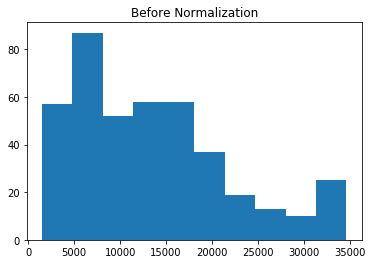

odometer


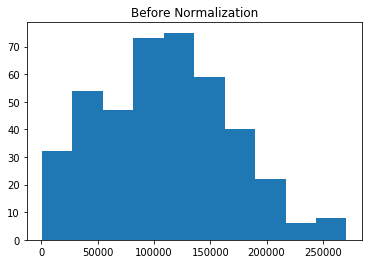

In [201]:
data = df_cleaned[['price','odometer']]
for i in data:
    print(i)
    plt.hist(df_cleaned[i])
    plt.title('Before Normalization')
    plt.show()

n_price


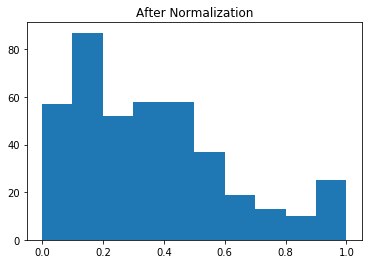

n_odometer


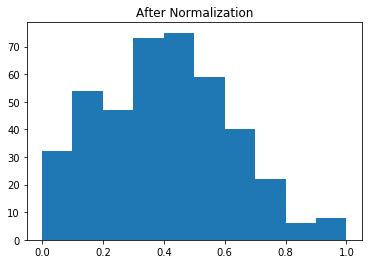

In [202]:
data = df_cleaned[['n_price', 'n_odometer']]
for i in data:
    print(i)
    plt.hist(df_normalized[i])
    plt.title('After Normalization')
    plt.show()

In [203]:
print(df_normalized.mean().round(decimals=1))
print(df_normalized.var().round(decimals=1))

n_price       0.4
n_odometer    0.4
n_lat         0.6
n_long        0.6
dtype: float64
n_price       0.1
n_odometer    0.0
n_lat         0.1
n_long        0.1
dtype: float64


In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(s)
df_std = pd.DataFrame(scaled)
df_std = df_std.rename(columns={0:'price', 1:'odometer', 2:'lat', 3:'long'})
df_std

,price,odometer,lat,long
0,-0.770887,1.011780,1.065842,-0.198309
1,-0.564810,-0.353835,1.078968,-0.216944
2,-0.312350,-0.318720,-0.094491,1.508169
3,0.403344,2.545466,0.828361,-0.261655
4,0.051074,1.377714,0.828361,-0.261655
...,...,...,...,...
411,-1.151925,0.944654,-0.555282,1.057841
412,-0.858368,0.802702,-0.555282,1.057841
413,0.075029,-1.332790,-0.509555,1.049863
414,2.474394,-0.807479,-1.688748,-1.953747


price


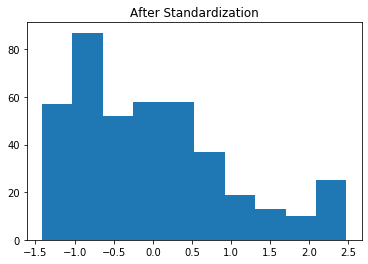

odometer


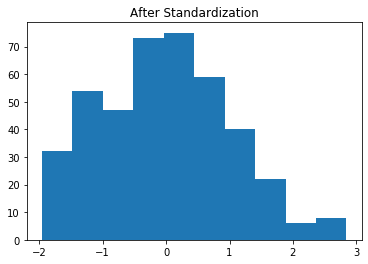

In [205]:
data = df_cleaned[['price','odometer']]
for i in data:
    print(i)
    plt.hist(df_std[i])
    plt.title('After Standardization')
    plt.show()

In [206]:
df_std.mean().round(decimals=1)

price      -0.0
odometer    0.0
lat         0.0
long        0.0
dtype: float64

In [207]:
df_std.var().round(decimals=1)

price       1.0
odometer    1.0
lat         1.0
long        1.0
dtype: float64

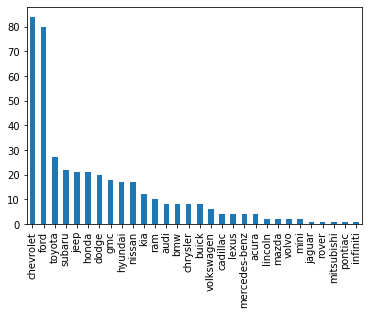

In [208]:
df_cleaned['manufacturer'].value_counts().plot(kind='bar')

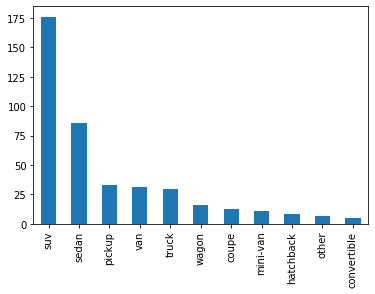

In [209]:
df_cleaned['type'].value_counts().plot(kind='bar')

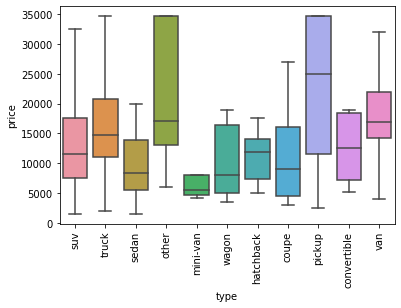

In [210]:
plt.xticks(rotation=90)
sns.boxplot(y='price', x='type', data=df_cleaned, showfliers=False)

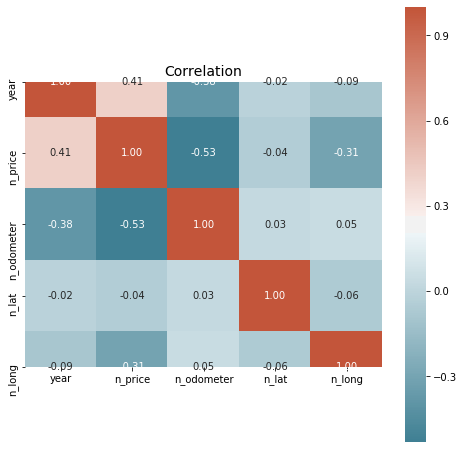

In [211]:
# Correlating numeric data
df_c=df_cleaned.copy()
df_c.drop(['price','odometer','lat','long'], axis=1, inplace=True) #drop extra colums of non-normalized data
dataCorr = df_c.corr()
plt.figure(figsize=(8,8))
plt.title('Correlation', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.show()


0      62.223723
1      34.056484
2      34.780776
4      93.857608
5      69.771512
         ...    
553    60.839187
554    57.911275
555    13.864510
556    24.699612
560    37.049908
Name: odometer_norm, Length: 416, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
mu:  41.35470784160385 , sigma: 20.62604910875637
1.3254508468380835


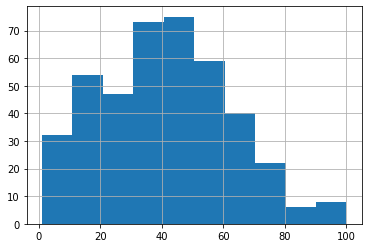

In [212]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(1,100))
df_cleaned["odometer_norm"]=scaler.fit_transform(df_cleaned[["odometer"]])
print(df_cleaned["odometer_norm"])
print(df_cleaned["odometer_norm"].hist())

odometer_norm = df_cleaned['odometer_norm']
mu = odometer_norm.mean()
sigma = odometer_norm.std(ddof=0)
print("mu: ", mu, ", sigma:", sigma)

z_critical = 1.96 # alpha level of 0.05 and two-tailed test
x_bar = 50
N = 10
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)


# Hypothesis Testing
Looking at the dataset we assume that the sales price of used suv's is low. We assume that the average sales price of used suv's is not more than $13560.03 



In [247]:
from scipy.stats import norm
def one_sided_hypo(sample_mean, pop_mean, pop_std, n, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (pop_std/np.sqrt(n))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False

df_x = df_cleaned.loc[df_cleaned['type'] == 'suv']
alpha = 0.05
sample = df_x['price'].sample(50)
sample_mean = sample.mean()
df_x = df_cleaned.loc[df_cleaned['type'] == 'suv']
pop_mean = df_cleaned['price'].mean()
n =  50
pop_std = df_cleaned['price'].std()

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, pop_std, n, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Accept NULL hypothesis')

H0 : μ <= 13560.039663461539
H1 : μ > 13560.039663461539
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : 0.569171043854627 

Accept NULL hypothesis


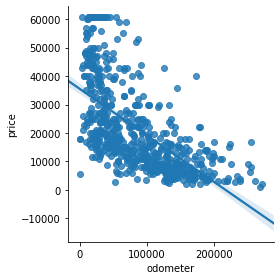

In [39]:
sns.lmplot(x="odometer", y="price", data=df_cleaned, height=4, palette="dark")

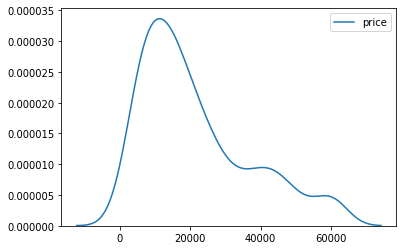

In [40]:
sns.kdeplot(df_cleaned['price'])

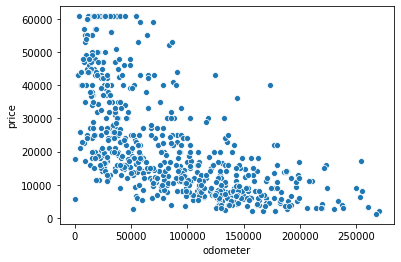

In [42]:
sns.scatterplot(x="odometer", y="price", data=df_cleaned)

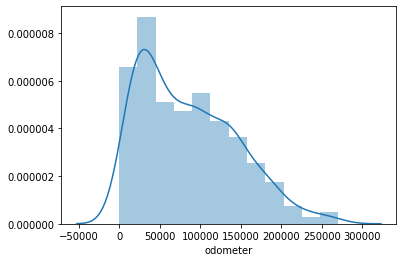

In [44]:
sns.distplot(df_cleaned['odometer'])

(20, 30)

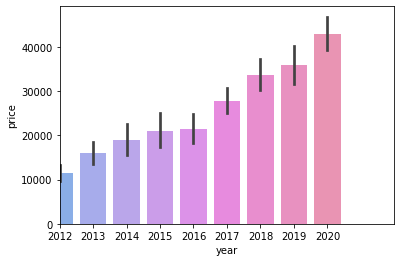

In [55]:
sns.barplot(x="year", y="price", data=df_cleaned)
plt.xlim(20,30)

(20, 30)

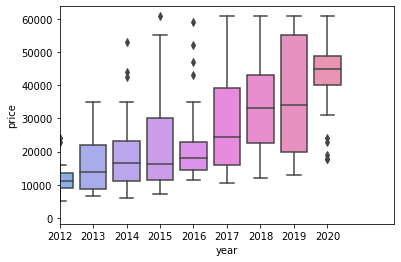

In [58]:
sns.boxplot(x="year", y="price",  data=df_cleaned)
plt.xlim(20,30)

(20, 30)

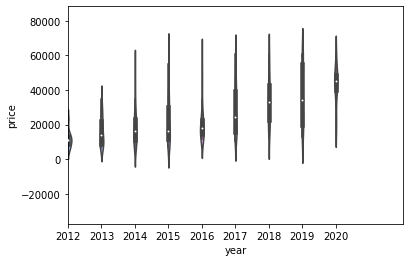

In [66]:
sns.violinplot(x="year", y="price",  data=df_cleaned)
plt.xlim(20,30)

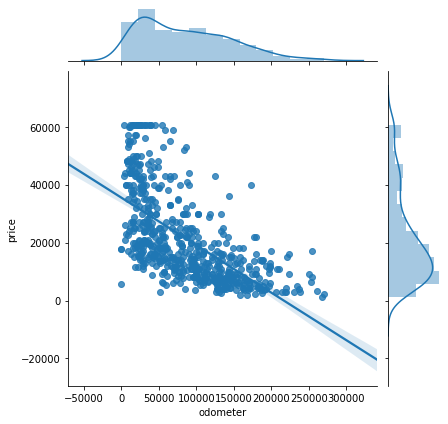

In [62]:
sns.jointplot(x="odometer", y="price", data=df_cleaned, kind="reg")